In [12]:
import pennylane as qml
from pennylane import numpy as np
from qiskit.providers.fake_provider import *

In [13]:
def configured_backend():
    backend = FakeManila()
    return backend

In [2]:
def ansatz(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
drawer = qml.draw(ansatz)
print(drawer([0,0]))

0: ──RX(0.00)─┤  
1: ──RY(0.00)─┤  


In [21]:
p = 0.5

dev = qml.device("qiskit.remote", wires = 2, backend=configured_backend())
# dev = qml.device("default.qubit", wires = 2, shots = 1000)
def circuit(params, interface="autograd"):
    ansatz(params)
    # qml.BitFlip(p, wires=0)
    return qml.expval(qml.PauliZ(0)) - qml.expval(qml.PauliZ(1))

qnode = qml.QNode(circuit, dev)

In [22]:
lr = 0.01
opt = qml.GradientDescentOptimizer(lr)

In [23]:
from IPython.display import clear_output
w = np.random.randn(2, 
requires_grad=True)
cost_history = []

for it in range(300):
    w, cost = opt.step_and_cost(qnode, w)
    clear_output(wait=True)
    print("Step {:3d}       Cost_L = {:9.7f}".format(it, cost), flush=True)
    cost_history.append(cost)

TypeError: unsupported operand type(s) for -: 'ExpectationMP' and 'ExpectationMP'

/var/folders/46/x_y_zr5s2rj1v37fwfjmjh9r0000gn/T/ipykernel_89752/562617301.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


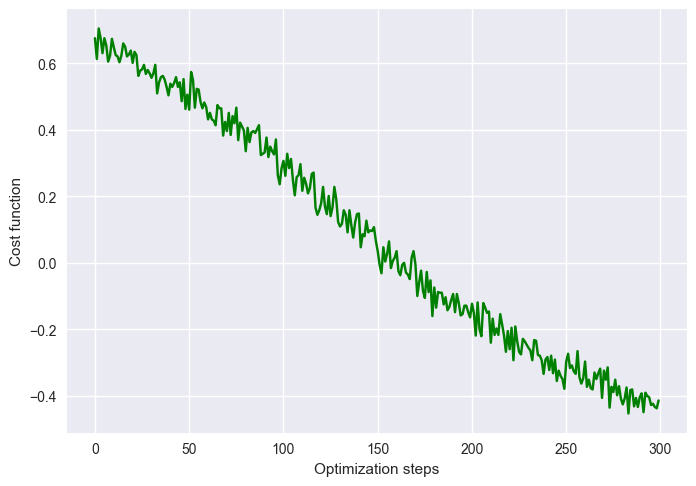

In [17]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
# plt.plot(np.log(cost_history), "g")
plt.plot(cost_history, "g")
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.show()

In [18]:
from pennylane.transforms import mitigate_with_zne, richardson_extrapolate, fold_global

mitigated_qnode = mitigate_with_zne(qnode, [1, 2, 3], fold_global, richardson_extrapolate)

In [19]:
from IPython.display import clear_output
w = np.random.randn(2, 
requires_grad=True)
cost_history = []

for it in range(300):
    w, cost = opt.step_and_cost(mitigated_qnode, w)
    clear_output(wait=True)
    print("Step {:3d}       Cost_L = {:9.7f}".format(it, cost), flush=True)
    cost_history.append(cost)

Step 299       Cost_L = -0.5019531


/var/folders/46/x_y_zr5s2rj1v37fwfjmjh9r0000gn/T/ipykernel_89752/562617301.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


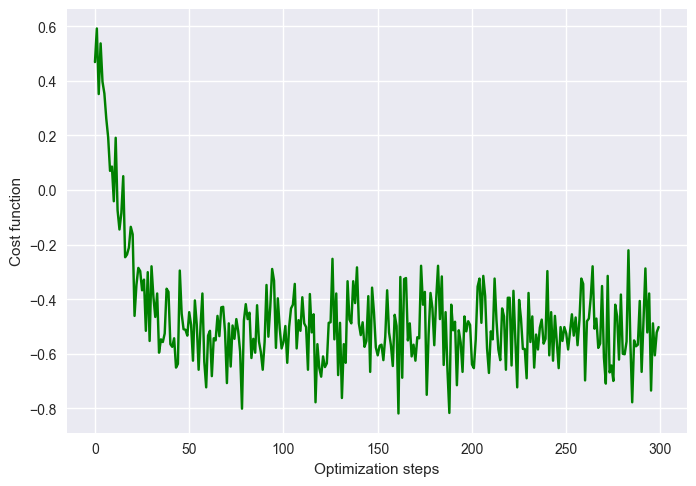

In [20]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
# plt.plot(np.log(cost_history), "g")
plt.plot(cost_history, "g")
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.show()